In [4]:
import re
import numpy as np
import json
import matplotlib.pyplot as plt
%matplotlib inline


In [5]:
def load_img(fn):
    #Duplicated from btviewer :/
    try:
        rawdata = np.load(fn,allow_pickle=True)
    except OSError:
        return None,None,None
    if type(rawdata)==list:
        n, img, data = rawdata
    if type(rawdata)==dict:
        n = rawdata['index']
        img = rawdata['img']
        data = rawdata['record']
    return n,img,data

In [54]:
def getcolour(img,x,y):
    x = (x//2)*2
    y = (y//2)*2
    patch = img[y-6:y+6,x-6:x+6].astype(float)
    #plt.imshow(patch)
    #plt.colorbar()
    r = np.mean(patch[::2,::2])
    g = np.mean(patch[1::2,::2])/2+np.mean(patch[::2,1::2])/2
    b = np.mean(patch[1::2,1::2])
    return r,g,b

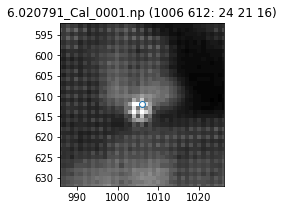

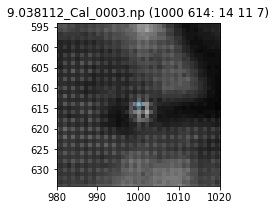

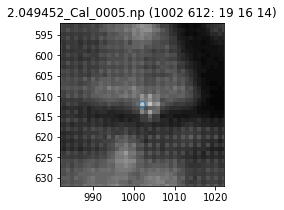

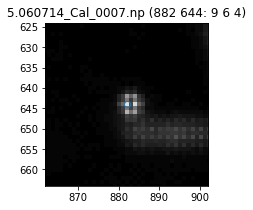

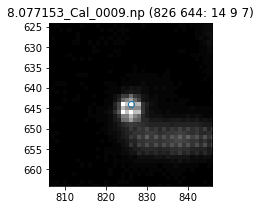

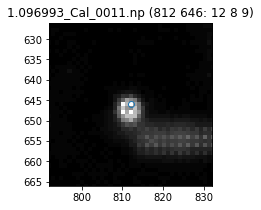

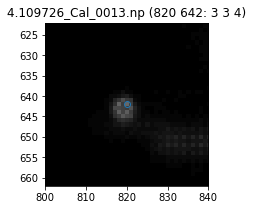

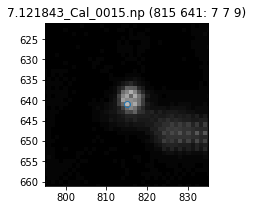

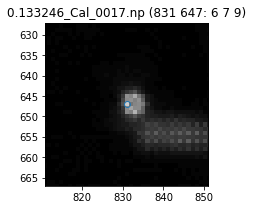

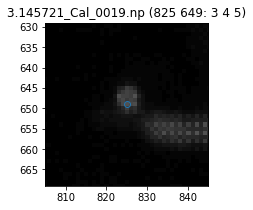

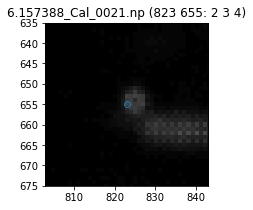

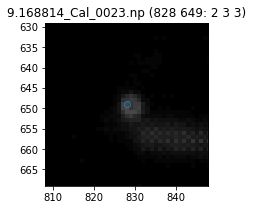

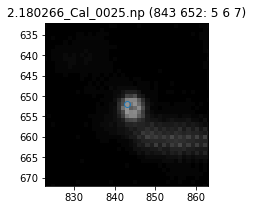

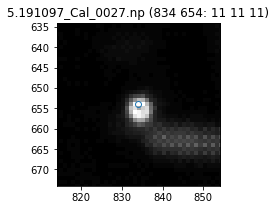

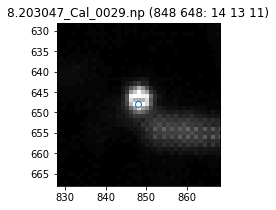

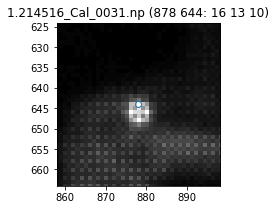

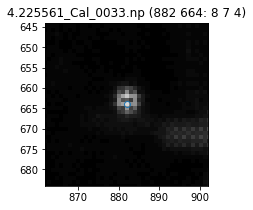

In [55]:
pathtojsonfile = '/home/mike/Documents/Research/bee/photos2022/140722/bee_track.json'
beetracks = json.load(open(pathtojsonfile,'rb'))
labels = {}
for camnum,bts in beetracks.items():
    for imgnum,bt in bts.items():
        for tagitem in bt:
            if 'label' in tagitem:
                if tagitem['label']=='none': continue
                labeltype, labelnum, units = re.findall('([a-zA-Z]*)([0-9]*)([a-zA-Z]*)',tagitem['label'])[0]
                if labeltype not in labels: labels[labeltype] = []
                if labeltype[:3]=='cal':
                    fn = tagitem['fn']
                    deg = (units=='deg')
                    x,y = tagitem['x'],tagitem['y']
                    n,img,data = load_img(fn)
                    if 'shift' in tagitem:
                        x = x - tagitem['shift'][1]
                        y = y - tagitem['shift'][0]

                    plt.figure(figsize=[3,3])
                    
                    plt.imshow(img,clim=[0,50],cmap='gray')
                    plt.plot(x,y,'o',fillstyle='none')
                    plt.xlim([x-20,x+20])
                    plt.ylim([y+20,y-20])
                
                    r,g,b = getcolour(img,x,y)
                    plt.title("%s (%d %d: %d %d %d)" % (fn[-20:],x,y,r,g,b))
                labels[labeltype].append([float(labelnum),deg,r,g,b])

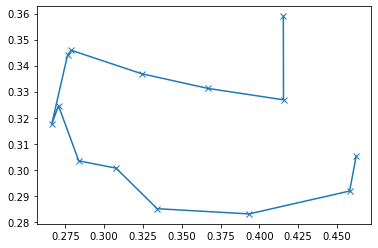

In [56]:
rgbs = np.array(labels['calA'])[3:,2:]
rgbs/=np.sum(rgbs,1)[:,None]
plt.plot(rgbs[:,0],rgbs[:,1],'-x')